Linear regression is one of the simplest and most widely used algorithms in machine learning. It models the relationship between a dependent variable
𝑦
y and one or more independent variables
𝑥
x by fitting a straight line (or hyperplane in higher dimensions) to the data. The main goal is to predict the value of
𝑦
y for a given
𝑥
x based on the assumption that they have a linear relationship.

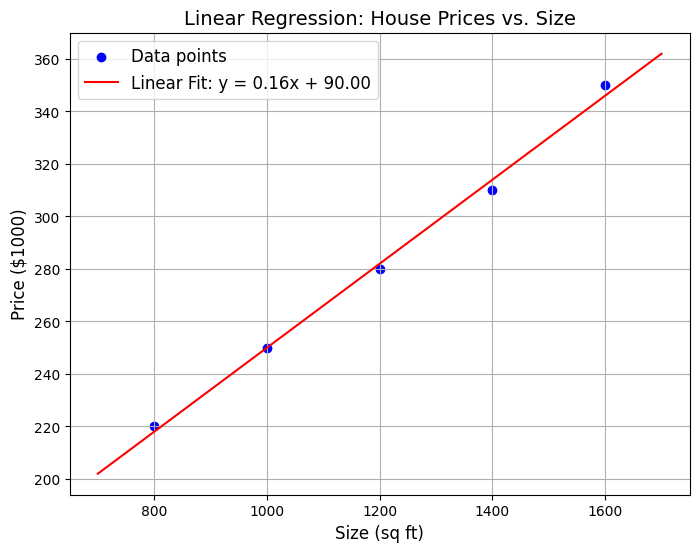

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset
size = np.array([800, 1000, 1200, 1400, 1600])  # House sizes in sq ft
price = np.array([220, 250, 280, 310, 350])    # Prices in $1000

# Perform linear regression (manually calculating coefficients)
m, c = np.polyfit(size, price, 1)  # Slope and intercept

# Regression line
size_line = np.linspace(700, 1700, 100)
price_line = m * size_line + c

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(size, price, color='blue', label='Data points')
plt.plot(size_line, price_line, color='red', label=f'Linear Fit: y = {m:.2f}x + {c:.2f}')
plt.title("Linear Regression: House Prices vs. Size", fontsize=14)
plt.xlabel("Size (sq ft)", fontsize=12)
plt.ylabel("Price ($1000)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [2]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Housing.csv'
housing_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
housing_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


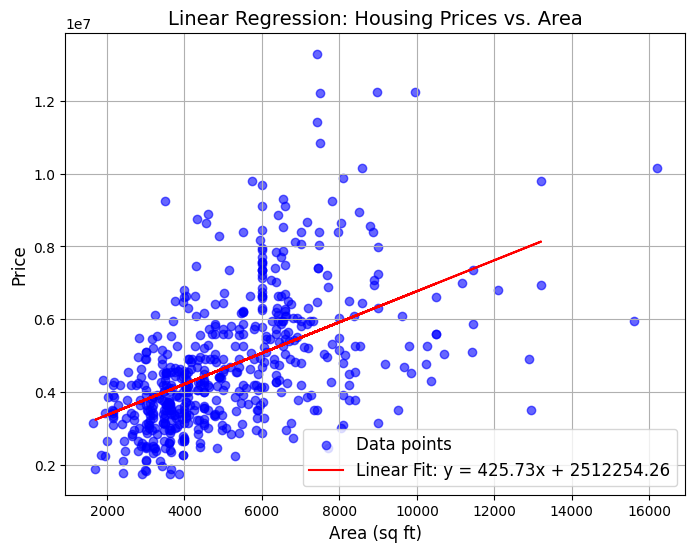

(3675286604768.185, 0.27287851871974644)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting relevant columns: price and area
data = housing_data[['price', 'area']].dropna()

# Splitting the data into features (X) and target (y)
X = data[['area']]
y = data['price']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Regression line details
slope = model.coef_[0]
intercept = model.intercept_

# Creating a visualization
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.6)
plt.plot(X_test, model.predict(X_test), color='red', label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.title("Linear Regression: Housing Prices vs. Area", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Displaying evaluation metrics
mse, r2


In [10]:
# Displaying the shape and info of the housing dataset
dataset_shape = housing_data.shape
dataset_info = housing_data.info()

dataset_shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(545, 13)

In [11]:
# Checking the percentage of missing values in each column
missing_percentage = housing_data.isnull().sum() * 100 / housing_data.shape[0]
missing_percentage


,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


The dataset has no missing values; all columns have 0% missing data. This ensures that the data is clean and ready for further analysis or model development.

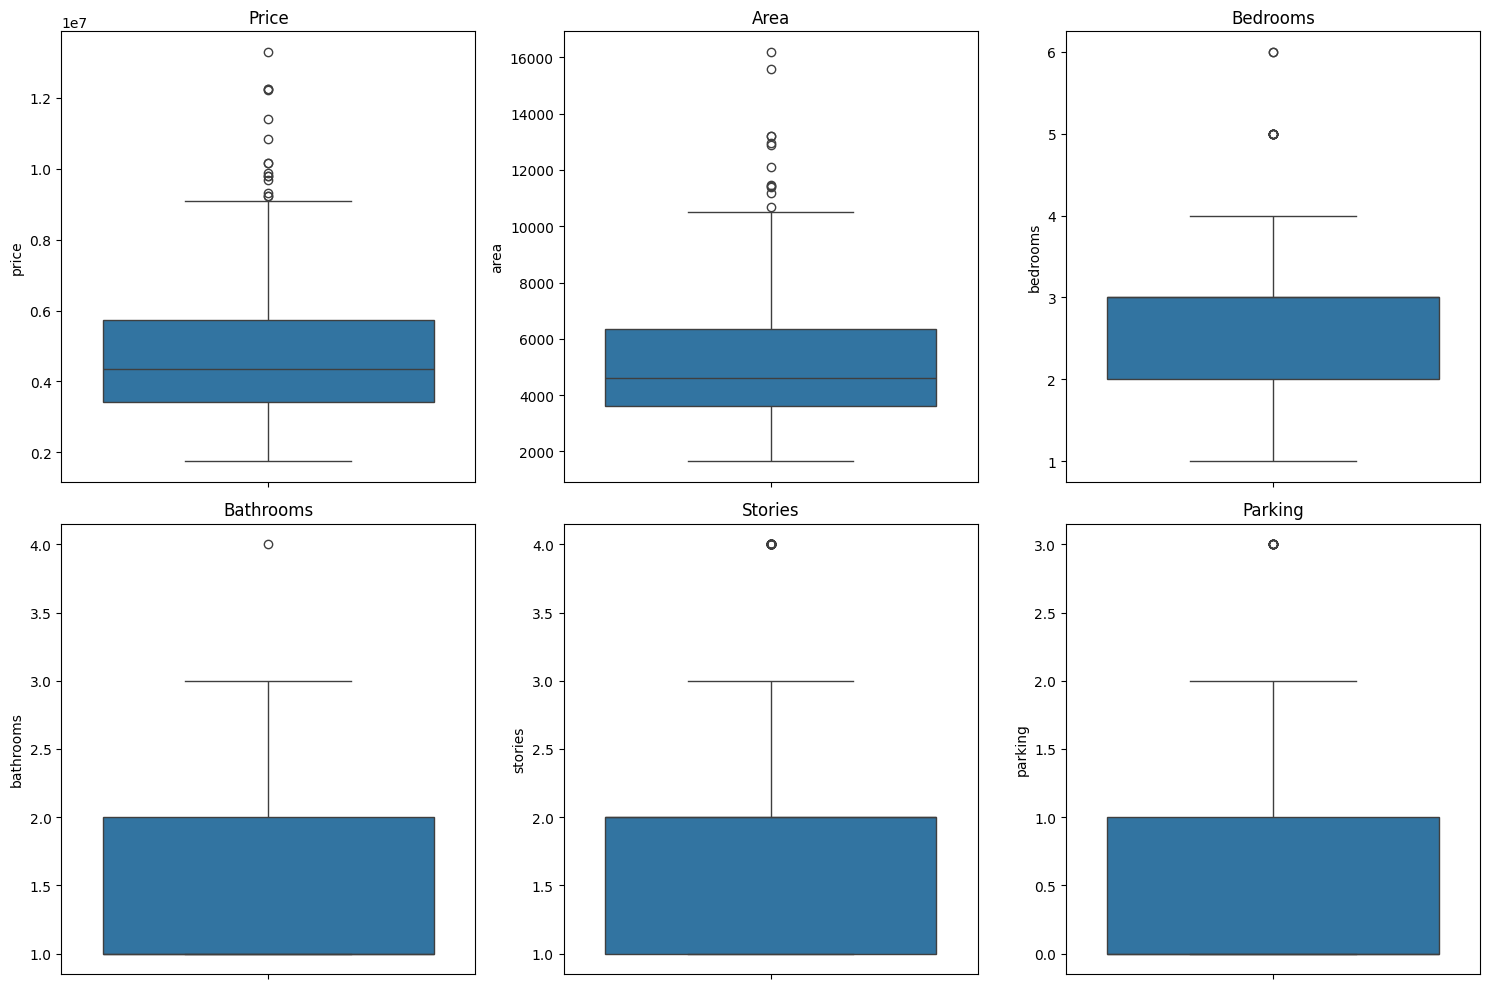

In [12]:
import seaborn as sns

# Creating boxplots for outlier analysis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plotting boxplots for selected columns
sns.boxplot(housing_data['price'], ax=axs[0, 0]).set_title("Price")
sns.boxplot(housing_data['area'], ax=axs[0, 1]).set_title("Area")
sns.boxplot(housing_data['bedrooms'], ax=axs[0, 2]).set_title("Bedrooms")
sns.boxplot(housing_data['bathrooms'], ax=axs[1, 0]).set_title("Bathrooms")
sns.boxplot(housing_data['stories'], ax=axs[1, 1]).set_title("Stories")
sns.boxplot(housing_data['parking'], ax=axs[1, 2]).set_title("Parking")

plt.tight_layout()
plt.show()


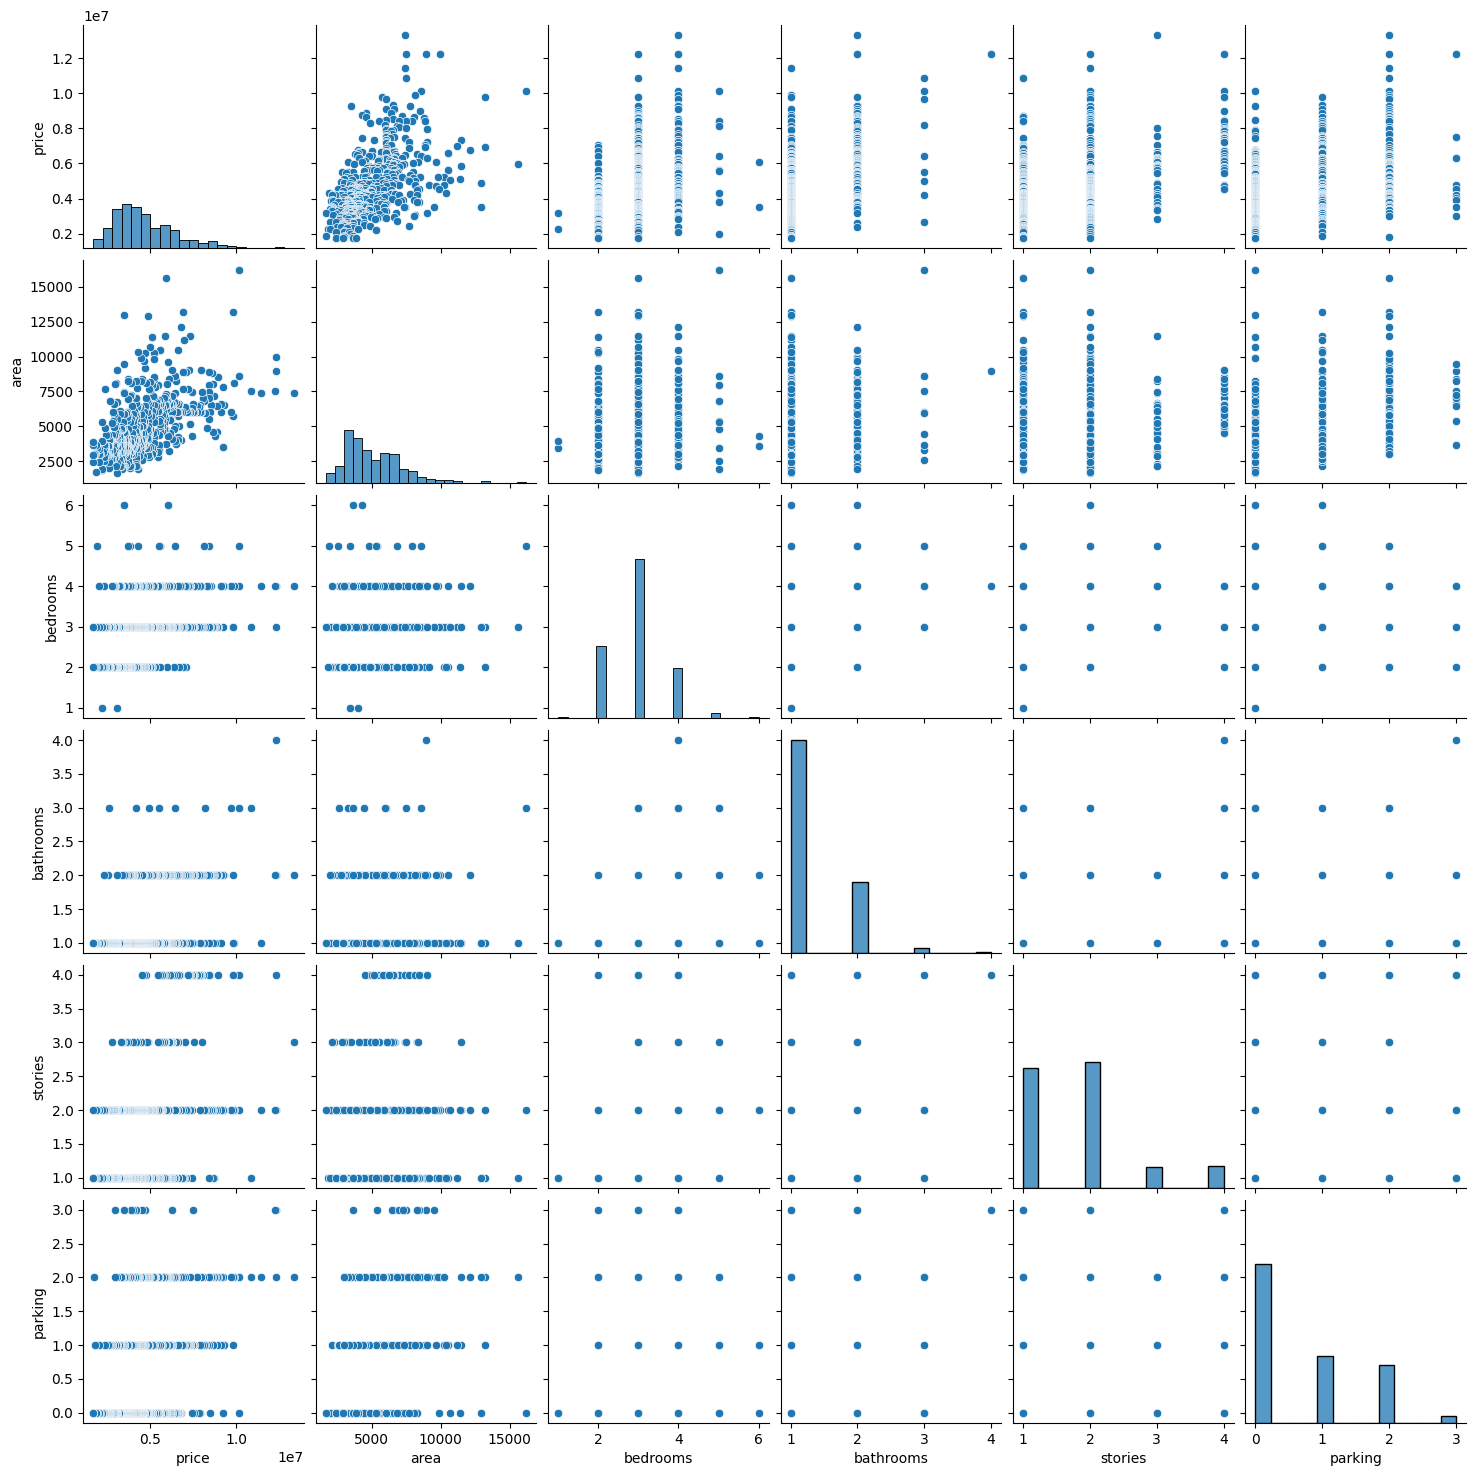

In [13]:
# Re-importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reloading the dataset in case the environment was reset
file_path = 'Housing.csv'
housing_data = pd.read_csv(file_path)

# Generating pair plots for the selected features
sns.pairplot(housing_data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.show()


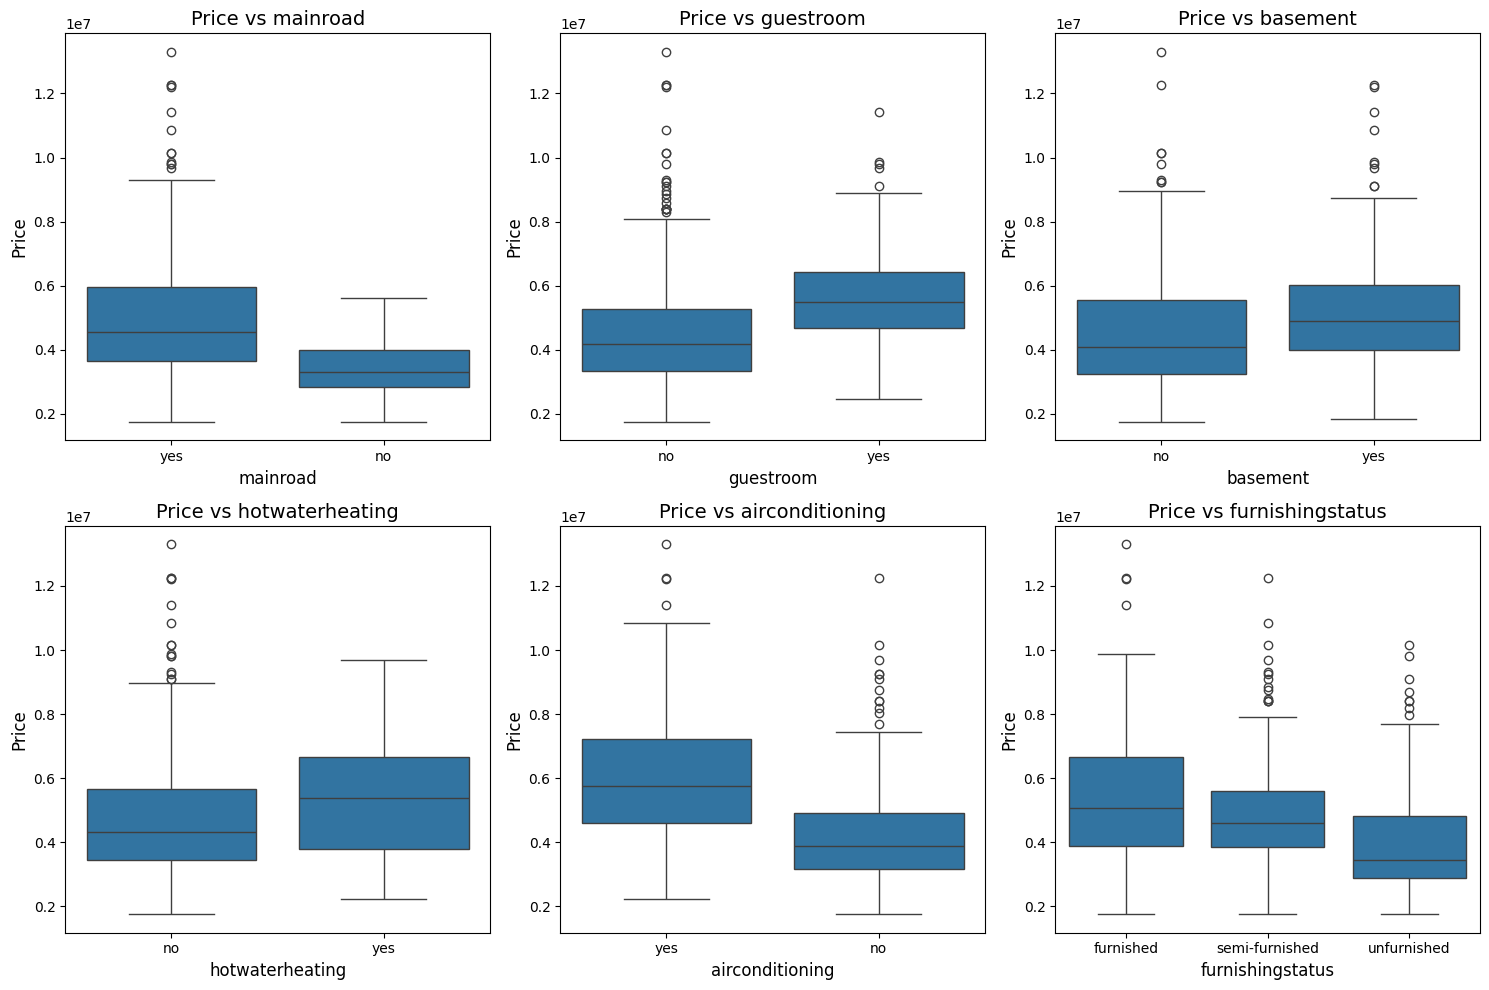

In [14]:
# Creating boxplots for categorical variables against 'price'
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

# Setting up the subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plotting each categorical feature against price
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=housing_data[feature], y=housing_data['price'], ax=axes[i])
    axes[i].set_title(f'Price vs {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Price', fontsize=12)

plt.tight_layout()
plt.show()


You can see that your dataset has many columns with values as 'Yes' or 'No'.

But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [15]:
# Encoding categorical columns with 'Yes'/'No' values as 1/0
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing_data[binary_columns] = housing_data[binary_columns].applymap(lambda x: 1 if x == 'yes' else 0)

# Verifying the changes
housing_data[binary_columns].head()


<ipython-input-15-c2b74169e767>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  housing_data[binary_columns] = housing_data[binary_columns].applymap(lambda x: 1 if x == 'yes' else 0)


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [16]:
# Creating dummy variables for the 'furnishingstatus' column
status = pd.get_dummies(housing_data['furnishingstatus'], prefix='furnishingstatus')

# Checking the first few rows of the dummy variables
status.head()


,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


Now, you don't need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where —

00 will correspond to furnished

01 will correspond to unfurnished

10 will correspond to semi-furnished

In [17]:
# Dropping one dummy column to avoid the dummy variable trap
status = status.drop(columns=['furnishingstatus_furnished'])

# Adding the remaining dummy variables to the original dataset
housing_data = pd.concat([housing_data, status], axis=1)

# Dropping the original 'furnishingstatus' column as it's now redundant
housing_data = housing_data.drop(columns=['furnishingstatus'])

# Verifying the changes
housing_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


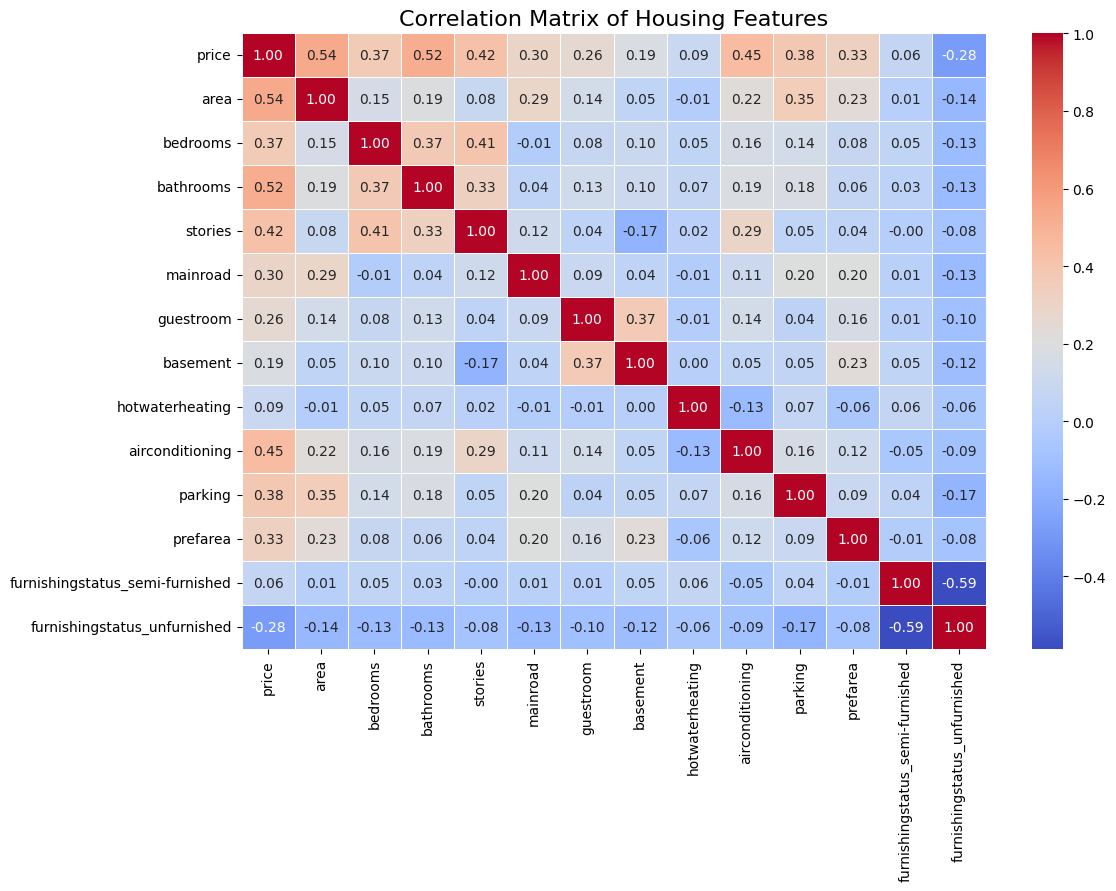

In [18]:
# Calculating the correlation matrix
correlation_matrix = housing_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Housing Features", fontsize=16)
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

# Defining the target variable (price) and features (all other columns except price)
X = housing_data.drop(columns=['price'])
y = housing_data['price']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((436, 13), (109, 13), (436,), (109,))

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying MinMax scaling to the features in both training and testing datasets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting the scaled arrays back to DataFrame for better interpretability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Verifying the scaling by checking summary statistics of the scaled data
X_train_scaled.describe()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.240835,0.391743,0.088685,0.260703,0.857798,0.178899,0.357798,0.050459,0.307339,0.228593,0.233945,0.431193,0.314220
std,0.151499,0.149561,0.159130,0.286031,0.349658,0.383708,0.479903,0.219141,0.461921,0.284980,0.423824,0.495812,0.464738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.195876,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.323711,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The features have been successfully scaled using Min-Max scaling, bringing all values into the range [0, 1]. This ensures that all features have comparable scales, avoiding disproportionately large or small coefficients in the regression model.

In [21]:
# Displaying the first few rows and summary statistics of the scaled training data
df_train = pd.concat([X_train_scaled, y_train], axis=1)

# Display the first few rows
df_train_head = df_train.head()

# Display summary statistics
df_train_describe = df_train.describe()

df_train_head, df_train_describe


(         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
 46   0.298969       0.4   0.333333  1.000000       1.0        0.0       0.0   
 93   0.381443       0.4   0.333333  0.000000       1.0        0.0       1.0   
 335  0.148866       0.2   0.000000  0.000000       1.0        0.0       1.0   
 412  0.065979       0.4   0.000000  0.333333       1.0        0.0       1.0   
 471  0.144330       0.4   0.000000  0.333333       1.0        0.0       0.0   
 
      hotwaterheating  airconditioning   parking  prefarea  \
 46               0.0              1.0  0.333333       0.0   
 93               0.0              1.0  1.000000       0.0   
 335              0.0              1.0  0.666667       0.0   
 412              0.0              0.0  0.000000       1.0   
 471              0.0              0.0  0.000000       0.0   
 
      furnishingstatus_semi-furnished  furnishingstatus_unfurnished    price  
 46                               0.0                           0

Proceed with regression model training?



In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(1754318687330.6697, 0.6529242642153172)

Building model using statsmodel, for the detailed statistics



In [ ]:
import statsmodels.api as sm

# Adding a constant for the intercept in statsmodels
X_train_sm = sm.add_constant(X_train_scaled)

# Building the regression model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Displaying the summary of the model
model_summary = model_sm.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           2.16e-97
Time:                        10:32:51   Log-Likelihood:                -6635.2
No. Observations:                 436   AIC:                         1.330e+04
Df Residuals:                     422   BIC:                         1.336e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2.228e+06   2.18e+05     10.206      0.000     1.8e+06    2.66e+06
area                             3.433e+06   3.62e+05      9.476      0.000    2.72e+06    4.15e+06
bedrooms                         3.839e+05   3.77e+05      1.018      0.309   -3.57e+05    1.12e+06
bathrooms                        3.283e+06   3.43e+05      9.564      0.000    2.61e+06    3.96e+06
stories                          1.222e+06   2.07e+05      5.919      0.000    8.16e+05    1.63e+06
mainroad                         3.679e+05   1.49e+05      2.464      0.014    7.44e+04    6.61e+05
guestroom                        2.316e+05   1.41e+05      1.648      0.100   -4.47e+04    5.08e+05
basement                         3.903e+05   1.18e+05      3.320      0.001    1.59e+05    6.21e+05
hotwaterheating                  6.846e+05   2.23e+05      3.070      0.002    2.46e+05    1.12e+06
airconditioning                  7.914e+05   1.17e+05      6.772      0.000    5.62e+05    1.02e+06
parking                          6.745e+05   1.85e+05      3.639      0.000     3.1e+05    1.04e+06
prefarea                         6.299e+05   1.21e+05      5.205      0.000    3.92e+05    8.68e+05
furnishingstatus_semi-furnished -1.269e+05   1.22e+05     -1.041      0.299   -3.66e+05    1.13e+05
furnishingstatus_unfurnished    -4.136e+05   1.34e+05     -3.077      0.002   -6.78e+05   -1.49e+05
==============================================================================
Omnibus:                       74.015   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.938
Skew:                           0.833   Prob(JB):                     2.10e-42
Kurtosis:                       5.791   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Show regression model coefficients and weights.



In [ ]:
# Extracting the model coefficients and weights
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + list(X_train.columns),
    'Coefficient': model_sm.params.values
})

coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
coefficients


,Feature,Coefficient
1,area,3.433346e+06
3,bathrooms,3.283334e+06
0,Intercept,2.228081e+06
4,stories,1.222430e+06
9,airconditioning,7.914267e+05
8,hotwaterheating,6.846499e+05
10,parking,6.745257e+05
11,prefarea,6.298906e+05
7,basement,3.902512e+05
2,bedrooms,3.838935e+05
